<a href="https://colab.research.google.com/github/Twinspeedr/DUDLClass/blob/main/gradientDescent/DUDL_GradientDescent_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 2D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Gradient descent in 2D

In [4]:
# The MatLab "peaks" function
def peaks(x,y):
    x,y = np.meshgrid(x,y) # expands to a 2D mesh
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
    return z

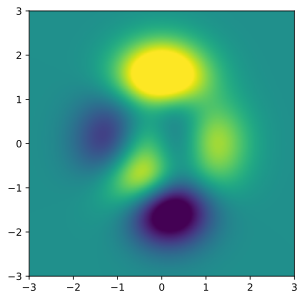

In [5]:
# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [7]:
### Create derivative functions using sympy
## NOTE: Sympy will not be used except with 1D and 2D functions

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
dpf_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' ) # sym.lambdify turns the sympy object into a function that can be called outside of sympy (numpy)
dpf_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

dpf_x(1,1).evalf() # Compute the partial derivative 'dpf' of the function, with respect to x, at location 1,1 = -1.0736983365079 #

-1.07369833656079

In [35]:
# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # Picks (2) random float values multiplies by (*4) and subtracts (-2) from each one # Could also try specifying coordinates
startpnt = localmin[:] # ':' Means all elements from the source array # This makes a new array from localmin including all elements but not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ dpf_x(localmin[0],localmin[1]).evalf(),
                    dpf_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[-1.34739624436821 0.204518866097005]
[-0.55518442 -0.68637303]


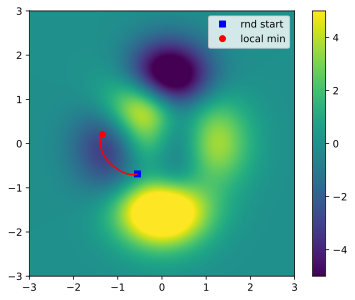

In [36]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='upper')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

In [25]:
### CODE Challenge Pt2: Modify the code above to perform Gradient ASCENT using localmax ###

# random starting point (uniform between -2 and +2)
localmax = np.random.rand(2)*4-2 # Picks (2) random float values multiplies by (*4) and subtracts (-2) from each one # Could also try specifying coordinates
startpnt = localmax[:] # ':' Means all elements from the source array. This makes a new array from localmax including all elements not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ dpf_x(localmax[0],localmax[1]).evalf(),
                    dpf_y(localmax[0],localmax[1]).evalf()
                  ])
  localmax = localmax - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmax


print(localmax)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[-0.08021712 -1.63544681]


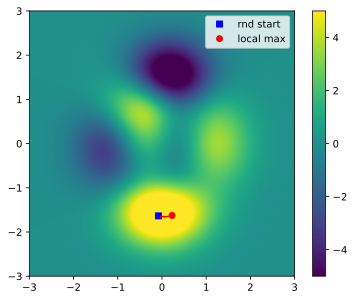

In [26]:
# localmax: let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='upper')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmax[0],localmax[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local max'])
plt.colorbar()
plt.show()

In [37]:
### CODE Challenge Pt3: Modify the original code above to perform Gradient...
# ASCENT by changing the gradient formula to ADD the gradient instead of...
# subtracting from the localmin

# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # Picks (2) random float values multiplies by...
    # (*4) and subtracts (-2) from each one # Could also try specifying coordinates
startpnt = localmin[:] # ':' Means all elements from the source array...
    # This makes a new array from localmin including all elements but not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ dpf_x(localmin[0],localmin[1]).evalf(),
                    dpf_y(localmin[0],localmin[1]).evalf()
                  ])
  localmin = localmin + learning_rate*grad  ### add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin


print(localmin)
print(startpnt)

[1.28568469724130 -0.00484755907559365]
[1.82805659 1.11581343]


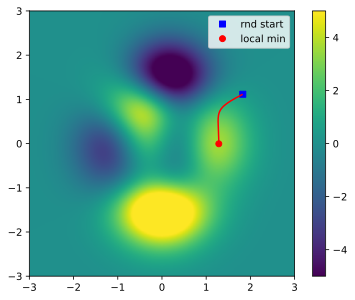

In [38]:
# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='upper')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

# Additional explorations

In [ ]:
# 1) Modify the code to force the initial guess to be [0,1.4]. Does the model reach a reasonable local minimum?
#
# 2) Using the same starting point, change the number of training epochs to 10,000. Does the final solution differ from
#    using 1000 epochs?
#
# 3) (Again with the same starting location) Change the learning to .1 (1000 epochs). What do you notice about the trajectory?
#    Try again with the learning rate set to .5, and then to .00001.
#